# k-Means Clustering

To cluster bank customers into categories based on their data.

Begin by importing necessary modules (make sure you have installed `plotly` by running `pip install plotly`):

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pickle

from sklearn.cluster import KMeans

%matplotlib inline

Import the dataset and see a sample:

In [2]:
df = pd.read_csv("../datasets/Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


And description:

In [3]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


We need to process the data to remove address and customer ID (we'll save this processed data in another dataset so that we can use the original dataset for plotting):

In [4]:
model_df = df.drop('Address', axis=1)
model_df = np.nan_to_num(model_df.values[:, 1:])

Initialize the model and fit it to the data (`n_clusters` signifies the number of clusters to form while `n_init` signifies how many times the algorithm will be applied, each time with different initial centroids; the best model from the iterations will be returned):

In [5]:
model = KMeans(init="k-means++", n_clusters=3, n_init=12)
model.fit(model_df)
df['labels'] = model.labels_

Now that we have the data categorized, let's take a look at the dataset again:

In [6]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,labels
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2,1


Let's plot this to see how well the model has worked (in the plot below, the point size signifies the age value while the point color signifies the cluster the point belongs to):

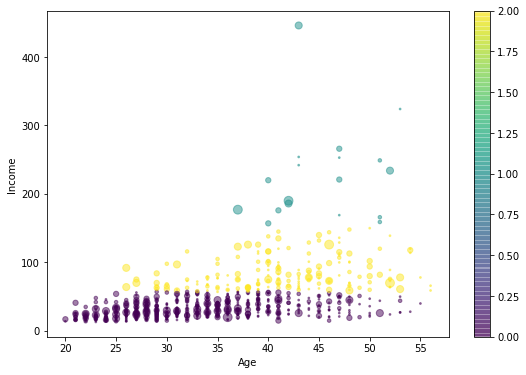

In [7]:
plt.figure(figsize=(9, 6))
plt.scatter(x=model_df[:, 0],
            y=model_df[:, 3],
            s=(np.pi*model_df[:, 1]**2),
            c=df['labels'].astype(np.float),
            alpha=0.5,
            cmap='viridis')
plt.colorbar()
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

Let's see an interactive 3D plot of this model (opens a plot in a new tab):

In [8]:
data = go.Scatter3d(x=df["Edu"],
                    y=df["Age"],
                    z=df["Income"],
                    marker={"color": df["labels"],
                            "size": 2.5,
                            "colorscale": "viridis"},
                    mode="markers")
figure = go.Figure(data, layout_title_text="k-Means Clustering")
figure.show(renderer="browser")

Finally, save this model:

In [9]:
pickle.dump(model, open('../saved_models/model_9.sav', 'wb'))